# GROUP E PROJECT - OPTIMISATION AND HYPERPARAMETER TUNING OF SEVERAL MACHINE LEARNING MODELS (KMEANS, KNN, ANN, ARIMA AND MEANSHIFT CLUSTERING) TO PREDICT INEQUALITY OF EDUCATION

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Inequality in Education.csv')

In [ ]:
# ---- Data Preprocessing ----

df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [ ]:
df.shape

(195, 17)

In [ ]:
df.describe()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
count,191.000000,137.000000,150.000000,157.000000,165.000000,168.000000,168.000000,168.000000,168.000000,172.000000,174.000000,176.000000,176.000000
mean,95.811518,20.654419,19.991823,19.473658,19.258472,19.135457,19.133751,18.853851,18.649140,18.396401,18.212993,18.006314,18.006314
std,55.307333,14.392552,14.342499,14.305732,14.470344,14.350759,14.475000,14.479261,14.558072,14.546446,14.553003,14.569313,14.569313
min,1.000000,1.322970,1.385640,1.390450,0.779397,0.765510,0.757375,0.724854,0.724854,0.550110,0.550110,0.550110,0.550110
25%,48.500000,6.917102,6.119250,6.011760,5.605950,6.127907,6.209205,6.130745,5.591175,5.854422,5.618515,5.518733,5.518733
50%,96.000000,17.825000,17.312742,16.421150,16.060770,15.957630,15.344075,14.461598,14.292875,13.565415,13.263530,12.843558,12.843558
75%,143.500000,30.542861,30.176057,30.201410,30.542861,30.564901,29.686837,29.647365,29.647365,29.326065,29.303075,28.335352,28.335352
max,191.000000,48.723000,48.723000,48.723000,49.321290,49.321290,49.321290,49.321290,49.321290,50.124110,50.124110,50.124110,50.124110


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            195 non-null    object 
 1   Country                         195 non-null    object 
 2   Human Development Groups        191 non-null    object 
 3   UNDP Developing Regions         151 non-null    object 
 4   HDI Rank (2021)                 191 non-null    float64
 5   Inequality in Education (2010)  137 non-null    float64
 6   Inequality in Education (2011)  150 non-null    float64
 7   Inequality in Education (2012)  157 non-null    float64
 8   Inequality in Education (2013)  165 non-null    float64
 9   Inequality in Education (2014)  168 non-null    float64
 10  Inequality in Education (2015)  168 non-null    float64
 11  Inequality in Education (2016)  168 non-null    float64
 12  Inequality in Education (2017)  168 

In [ ]:
#dropping ISO3 and Country coloumn as the data will be different for each of the rows (might make big number of cluster)
df = df.drop(['ISO3', 'Country'], axis=1)

In [ ]:
df.head()

,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [ ]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

numeric_features = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_features)
df[numeric_features.columns] = numeric_features.fillna(numeric_features.mean())

In [ ]:
# ---- Exploratory Data Analysis (EDA) ----

# Basic Stats
basic_stats = df.describe()
print("Basic Stats:")
print(basic_stats)

Basic Stats:
       HDI Rank (2021)  Inequality in Education (2010)  \
count       195.000000                      195.000000   
mean         95.811518                       20.654419   
std          54.734185                       12.050537   
min           1.000000                        1.322970   
25%          49.500000                       12.327187   
50%          95.811518                       20.654419   
75%         141.500000                       24.905756   
max         191.000000                       48.723000   

       Inequality in Education (2011)  Inequality in Education (2012)  \
count                      195.000000                      195.000000   
mean                        19.991823                       19.473658   
std                         12.569474                       12.828372   
min                          1.385640                        1.390450   
25%                         10.518170                        8.568115   
50%                       

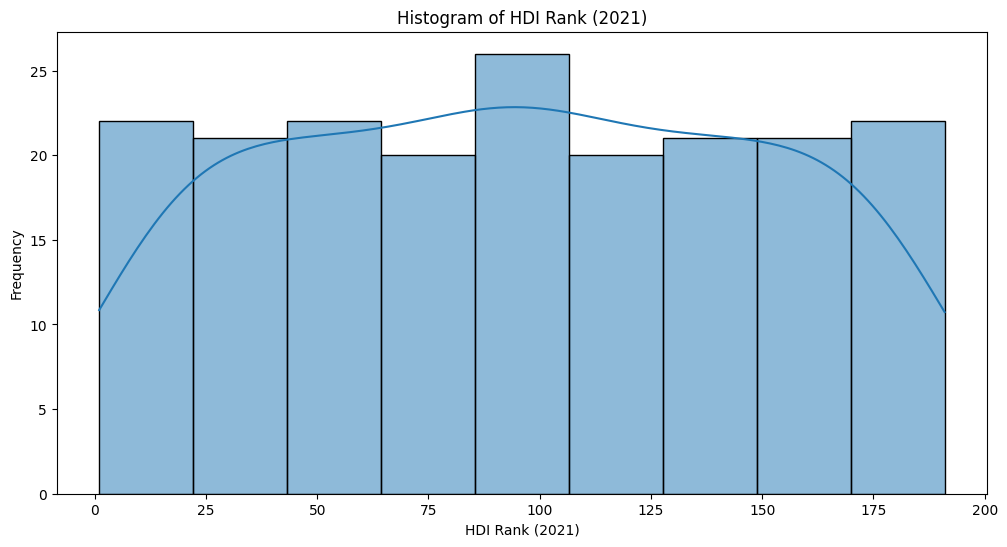

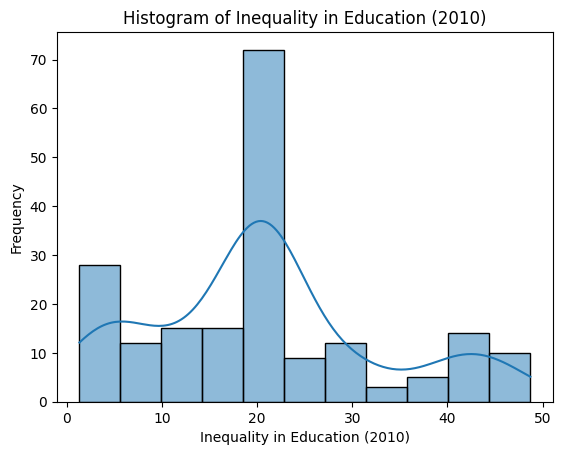

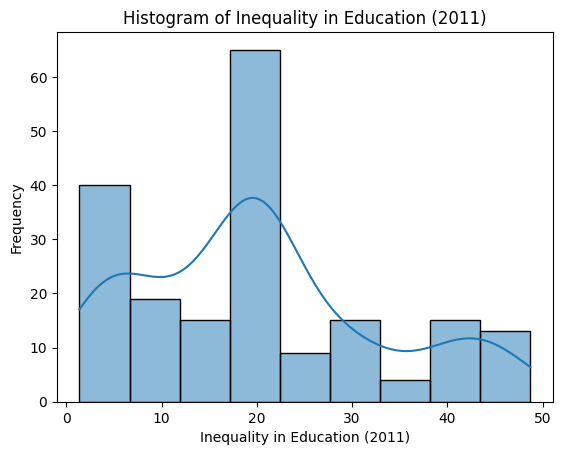

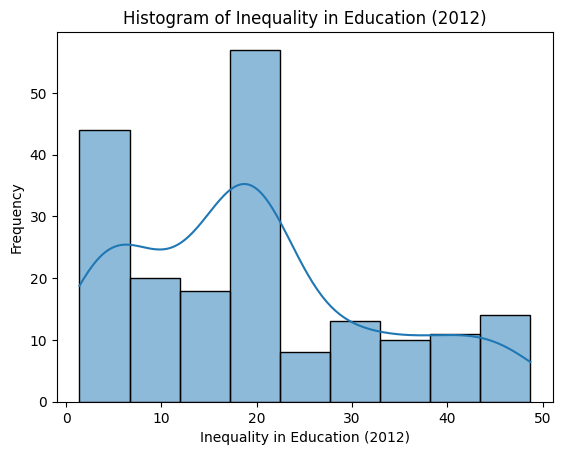

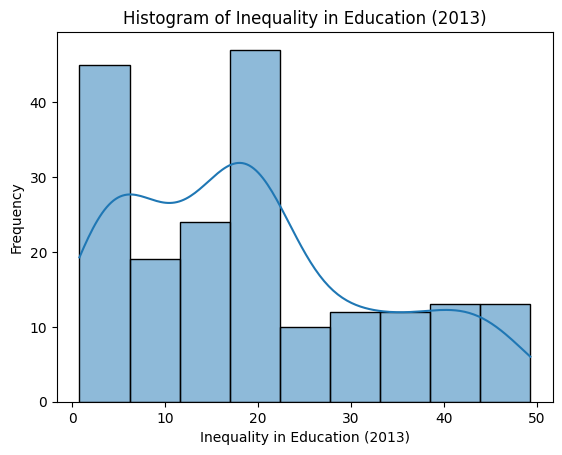

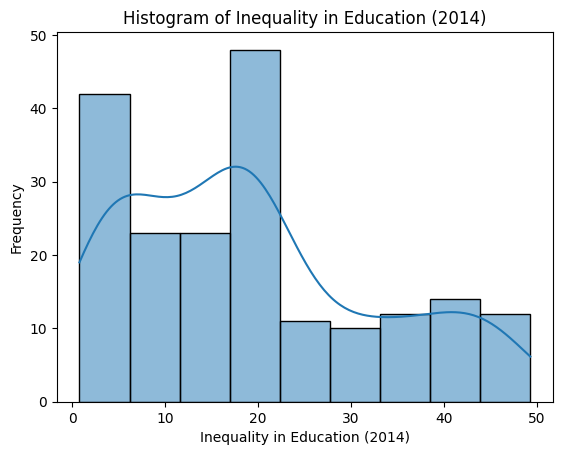

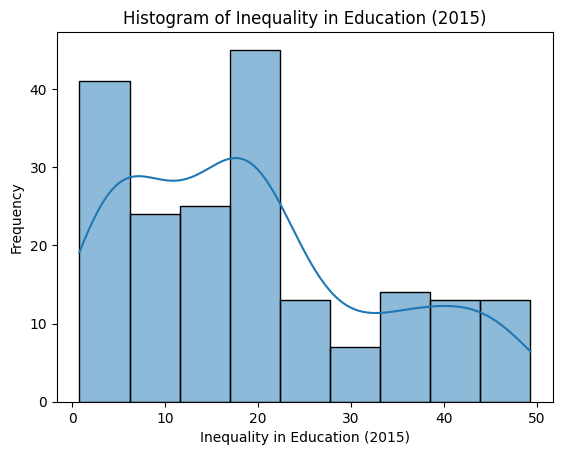

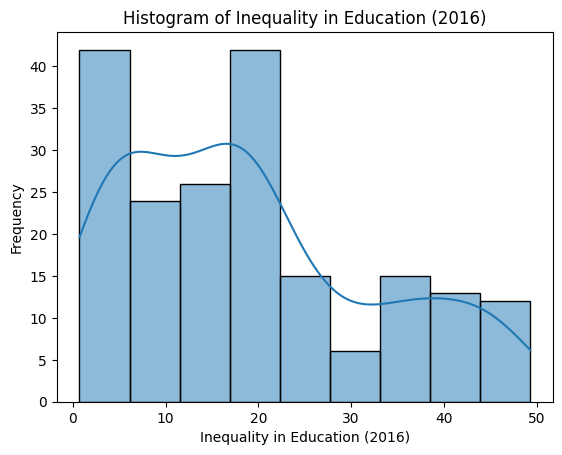

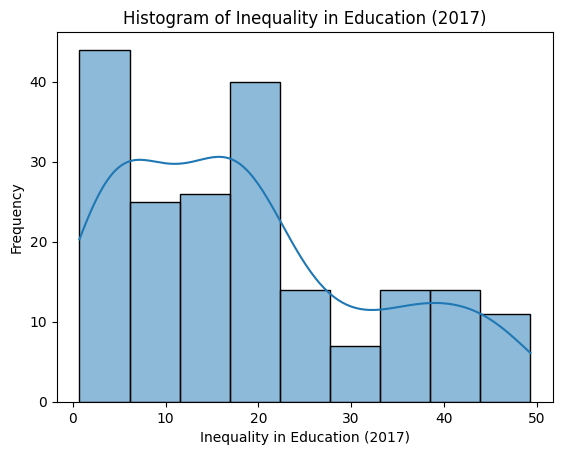

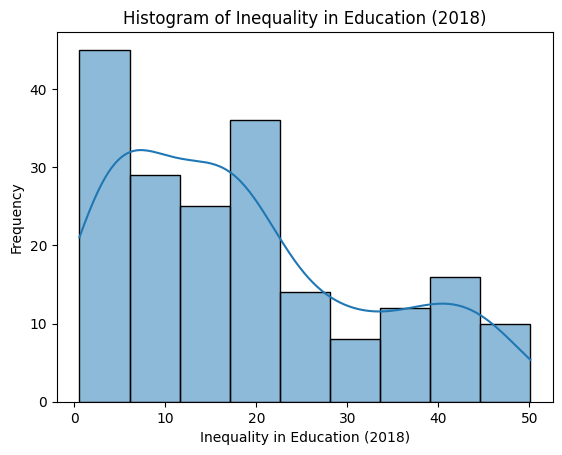

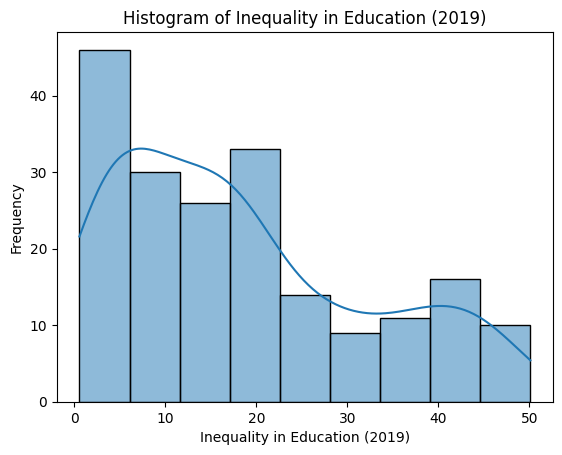

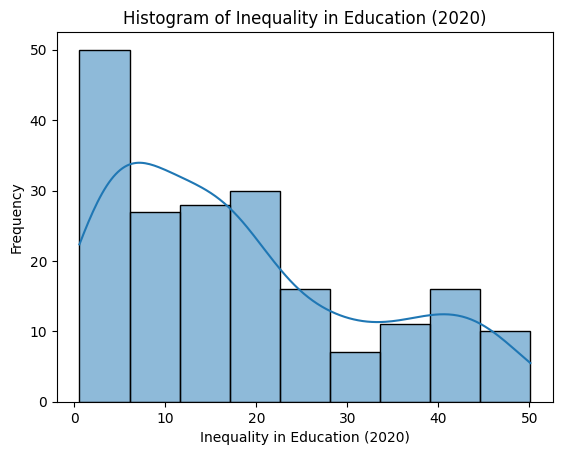

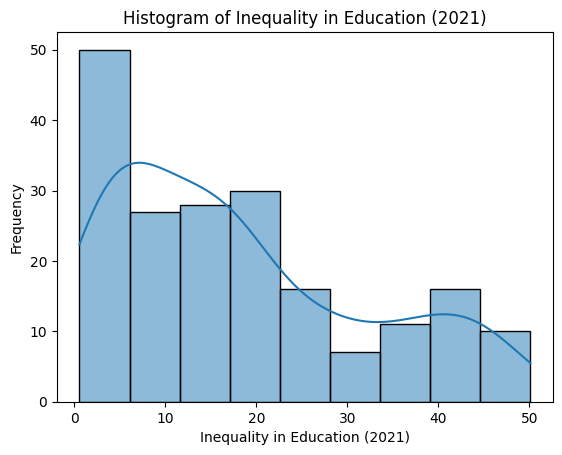

In [ ]:
# Histograms
plt.figure(figsize=(12, 6))
for column in numeric_features.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

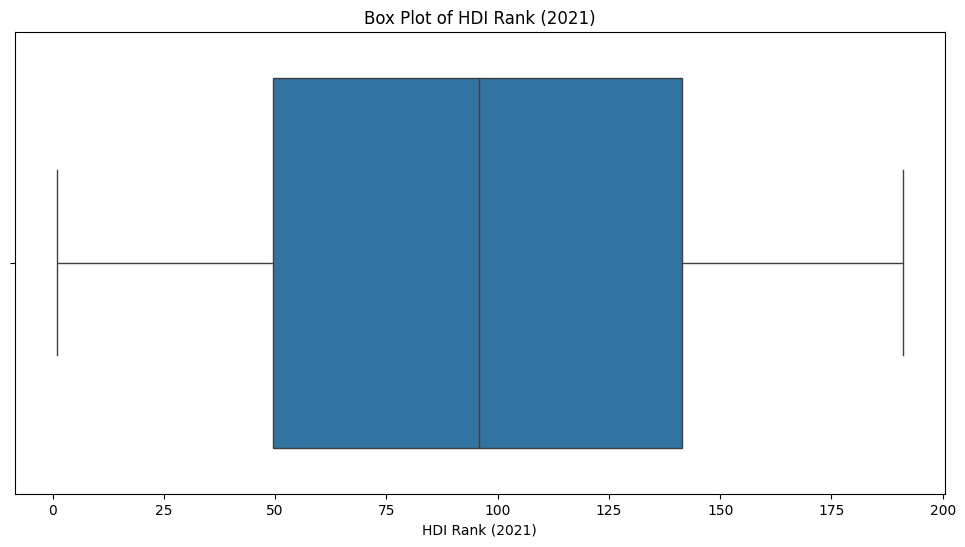

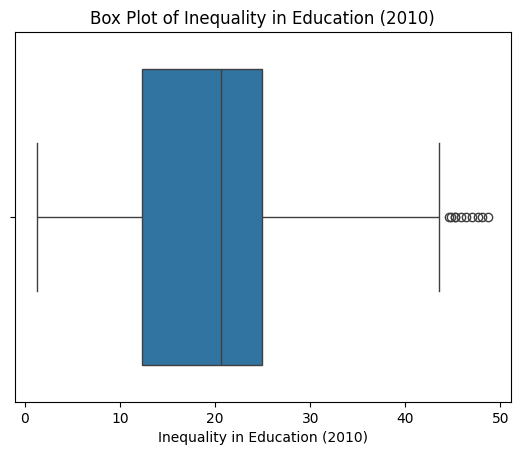

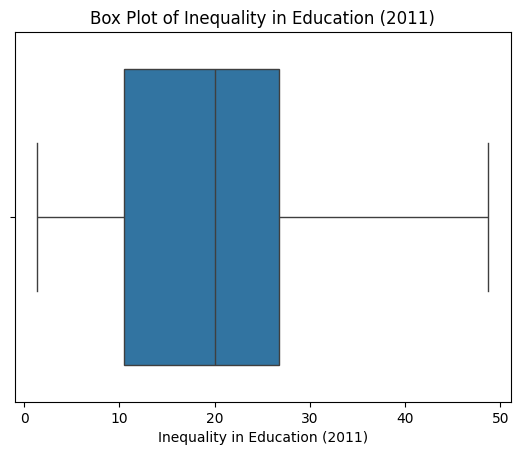

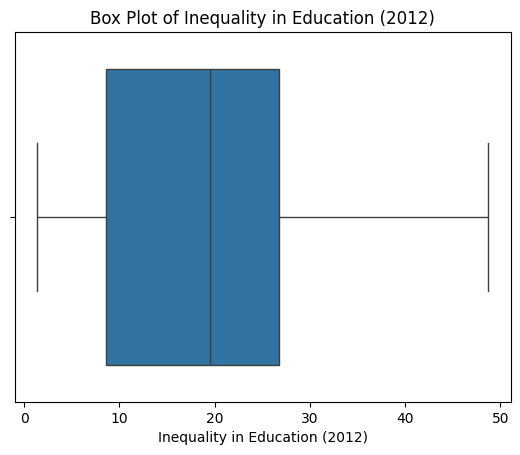

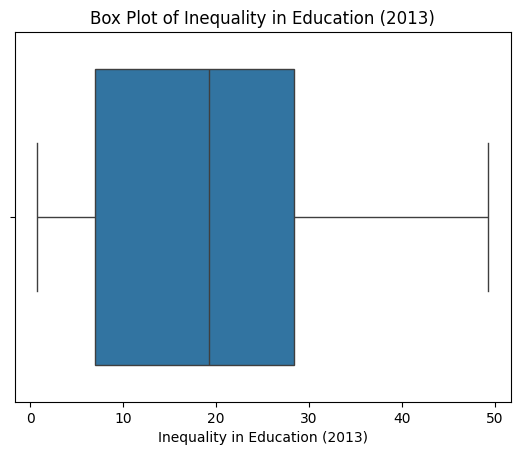

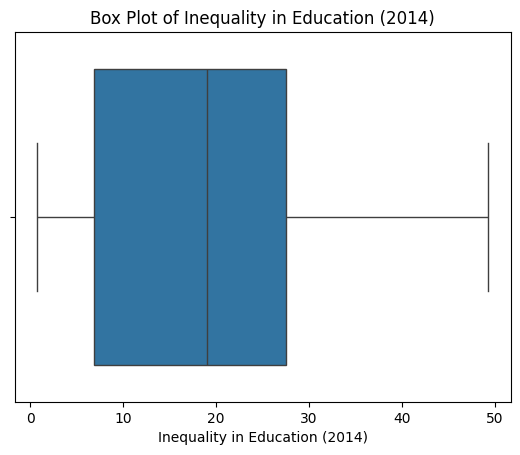

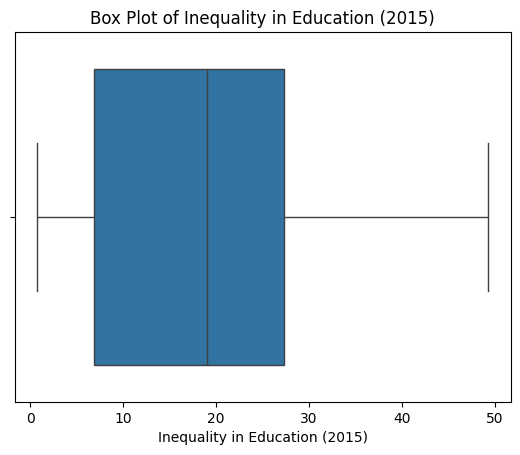

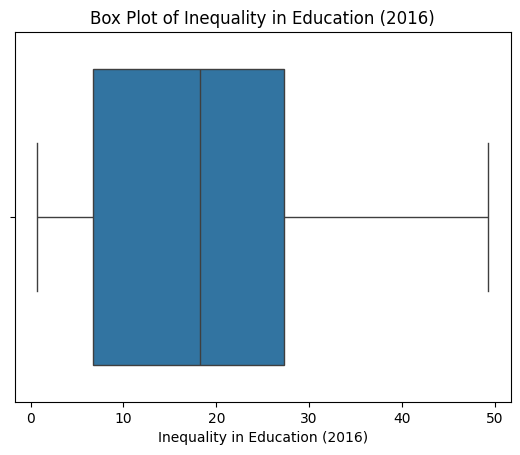

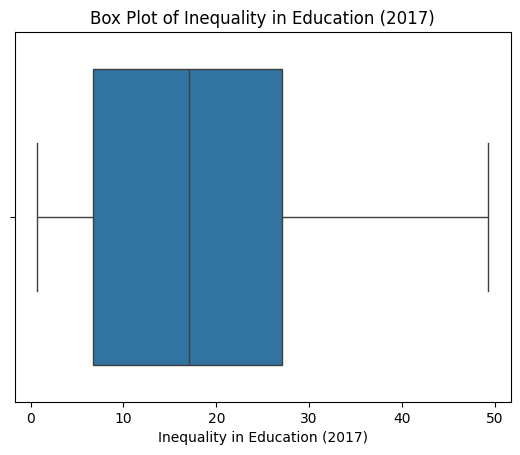

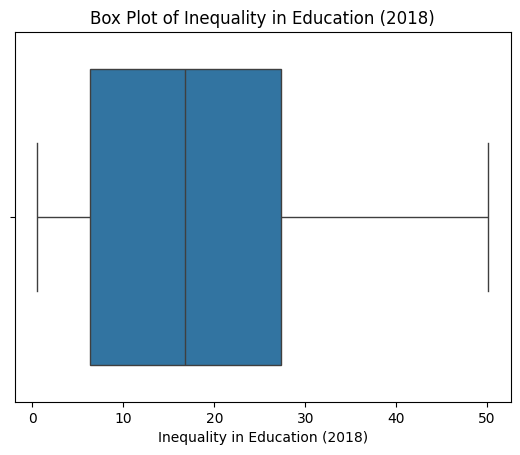

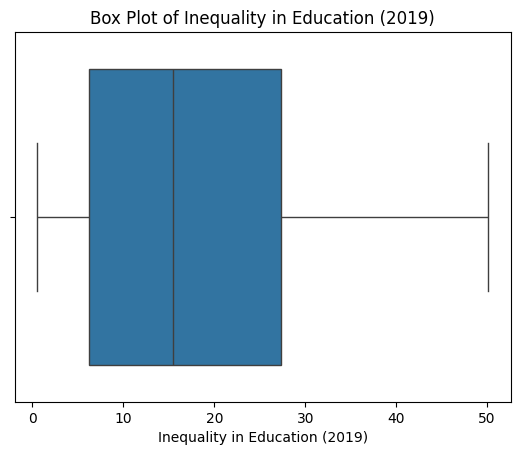

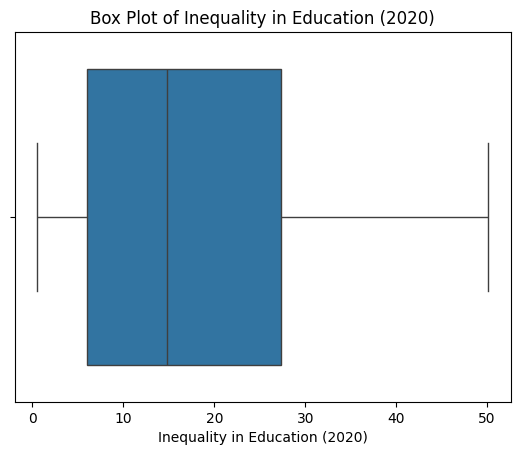

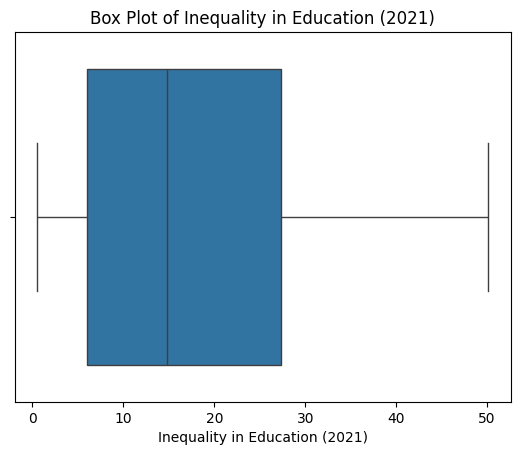

In [ ]:
# Box Plots
plt.figure(figsize=(12, 6))
for column in numeric_features.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

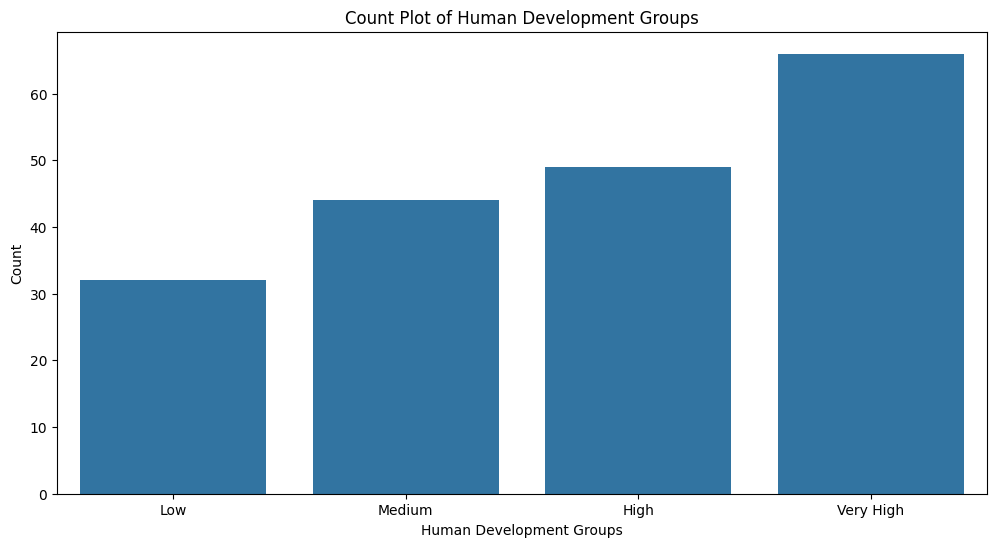

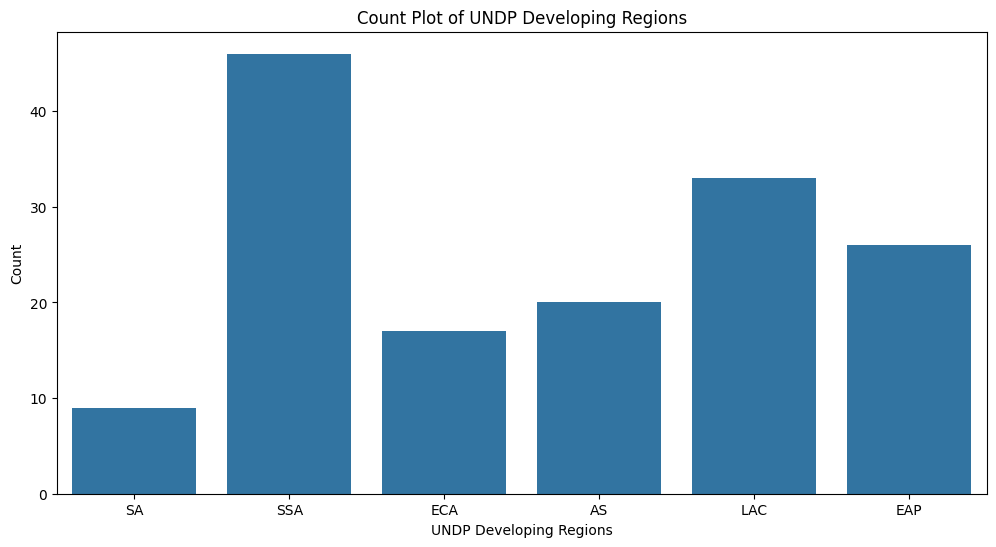

In [ ]:
# Select categorical features
categorical_features = df.select_dtypes(include=[object])
for column in categorical_features.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Convert categorical data to numeric using Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
columns_to_check = df.columns[[0, 1]]  # New data by LabelEncoder Column

for column in columns_to_check:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print()

Column: Human Development Groups
Human Development Groups
3    66
0    49
2    44
1    32
4     4
Name: count, dtype: int64

Column: UNDP Developing Regions
UNDP Developing Regions
5    46
6    44
3    33
1    26
0    20
2    17
4     9
Name: count, dtype: int64



In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
df.shape

(195, 15)

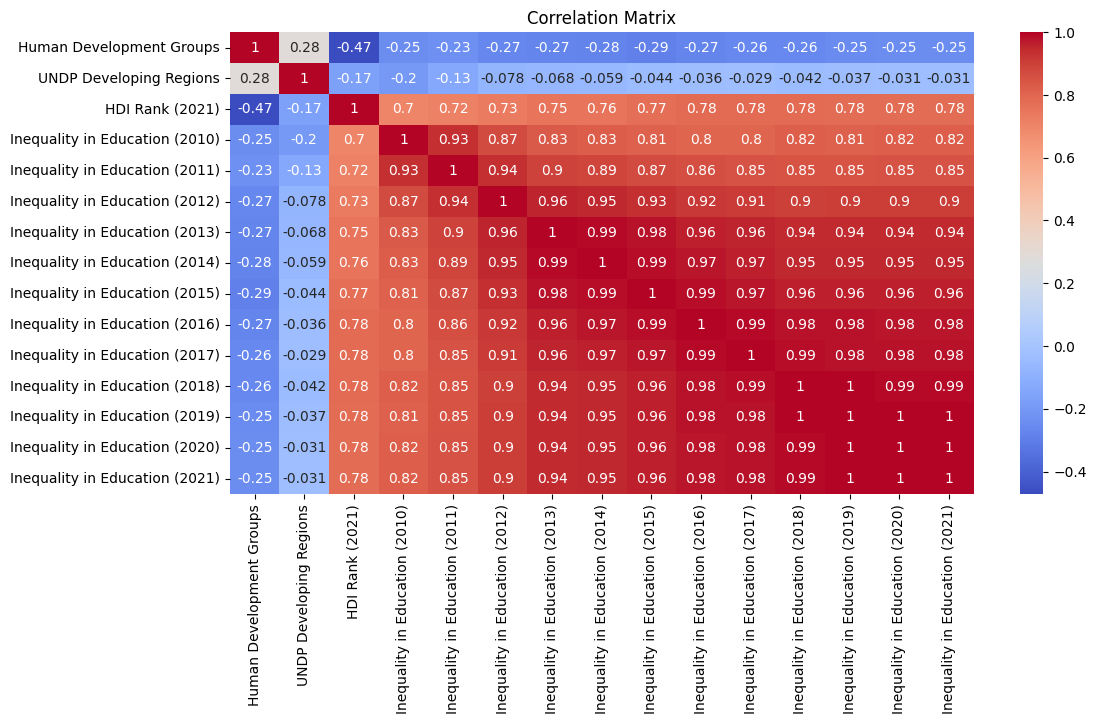

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# FEATURE SELECTION

In [ ]:
# Feature Selection
features = ['Inequality in Education (2010)', 'Inequality in Education (2011)',
            'Inequality in Education (2012)', 'Inequality in Education (2013)',
            'Inequality in Education (2014)', 'Inequality in Education (2015)',
            'Inequality in Education (2016)', 'Inequality in Education (2017)',
            'Inequality in Education (2018)', 'Inequality in Education (2019)',
            'Inequality in Education (2020)', 'Inequality in Education (2021)']

# Using only rows where no NaN values exist in the selected feature set
df_filtered = df.dropna(inplace=False)
X = df_filtered[features].values  # Convert to NumPy array

# K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = df[features].values
y = df['Inequality in Education (2021)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed


knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (k-NN):", mse)
print("Root Mean Squared Error (k-NN):", rmse)
print("R-squared (k-NN):", r2)


Mean Squared Error (k-NN): 2.637734891171875
Root Mean Squared Error (k-NN): 1.6241104922916652
R-squared (k-NN): 0.9860607704899829


The results show that the k-NN model achieves a low RMSE of approximately 1.62, indicating good predictive accuracy, and a high R2 score of about 0.99, suggesting that the model explains a substantial amount of variance in the target variable.

Mean Squared Error (k-NN): 2.637734891171875
R-squared (k-NN): 0.9860607704899829


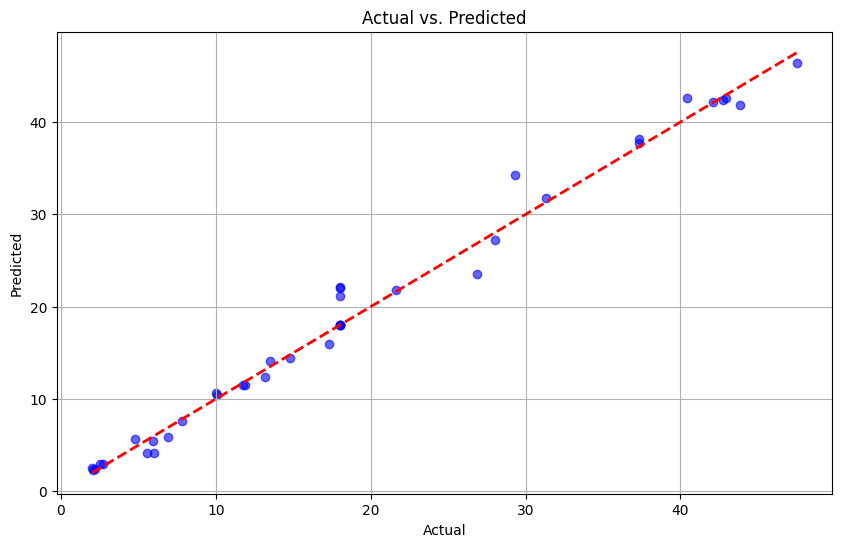

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


X = df[features].values
y = df['Inequality in Education (2021)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (k-NN):", mse)
print("R-squared (k-NN):", r2)


plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


A scatter plot visualizes the actual versus predicted values, where points

closer to the diagonal line (red) indicate better predictions.

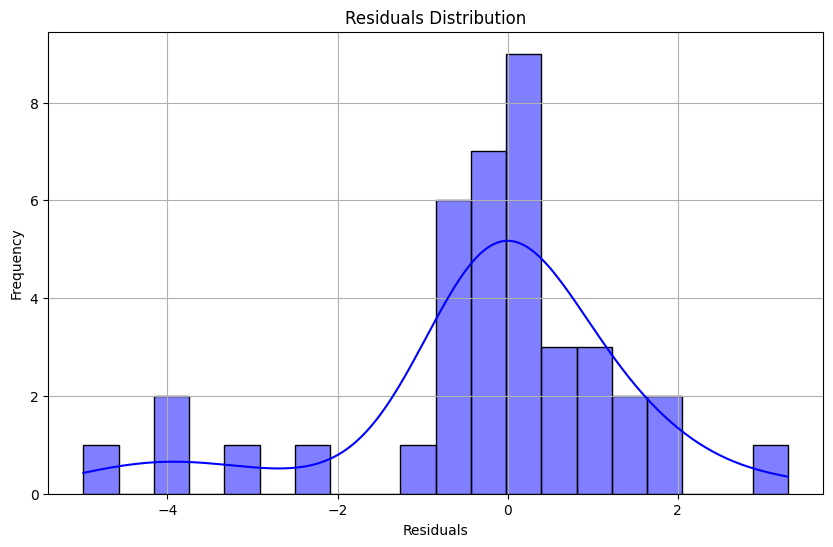

In [ ]:
# Import necessary libraries for k-Nearest Neighbors (k-NN)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X = df[features].values
y = df['Inequality in Education (2021)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the k-NN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed

# Train the k-NN model
knn_model.fit(X_train, y_train)

# Make predictions using the model
y_pred = knn_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20, color='blue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram plot visualizes the distribution of residuals, showing how closely predictions align with actual outcomes and highlighting any systematic errors in the model predictions.

# ARTIFICIAL NEURAL NETWORK (ANN)

In [ ]:
# Import necessary libraries for ANN
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Split the data into training and testing sets
X = df[features].values
y = df['Inequality in Education (2021)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/100
13/13 [==============================] - 2s 29ms/step - loss: 492.5004 - val_loss: 204.5302
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 141.8742 - val_loss: 31.2447
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 16.1926 - val_loss: 21.9676
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 12.5341 - val_loss: 11.5053
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 9.7753 - val_loss: 9.7706
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 7.7984 - val_loss: 8.9260
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 6.0358 - val_loss: 6.6806
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 5.4087 - val_loss: 5.6627
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 4.3295 - val_loss: 4.9536
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 3.7894 - val_loss: 4

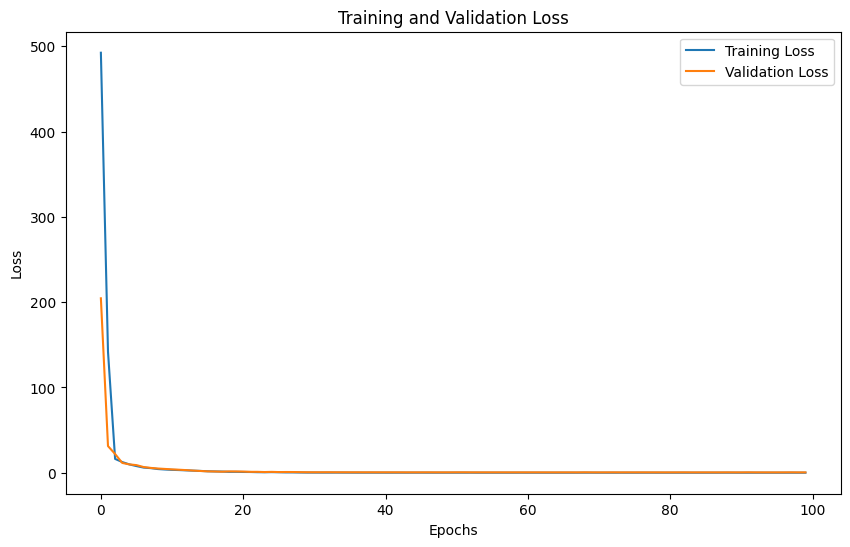

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# ARIMA MODEL

In [ ]:
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product

In [ ]:
# Ignore warning messages
warnings.filterwarnings("ignore")

# Define the range for p, d, q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Function to evaluate ARIMA model
def evaluate_arima_model(X, arima_order):
    predictions = []
    actual = []
    for i in range(len(X)):
        try:
            model = ARIMA(X[i][:-1], order=arima_order)  # Accessing NumPy array elements
            model_fit = model.fit()
            yhat = model_fit.forecast(steps=1)[0]
            predictions.append(yhat)
            actual.append(X[i][-1])
        except:
            continue
    # Calculating RMSE and MAE
    if len(predictions) > 0:
        rmse = np.sqrt(mean_squared_error(actual, predictions))
        mae = mean_absolute_error(actual, predictions)
        return rmse, mae
    else:
        return float('inf'), float('inf')

# Grid search for best p, d, q values
best_score, best_cfg = float('inf'), None
for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        rmse, mae = evaluate_arima_model(X, order)
        if rmse < best_score:
            best_score, best_cfg = rmse, order
        print(f'ARIMA{order} RMSE={rmse}, MAE={mae}')
    except:
        continue

print(f'Best ARIMA{best_cfg} RMSE={best_score}')

# Using the best parameters to forecast
predicted = []
actual = []
for i in range(len(X)):
    model = ARIMA(X[i][:-1], order=best_cfg)
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=1)[0]
    predicted.append(yhat)
    actual.append(X[i][-1])

# Calculating final RMSE and MAE with the best parameters
final_rmse = np.sqrt(mean_squared_error(actual, predicted))
final_mae = mean_absolute_error(actual, predicted)

print("Predicted values:", predicted)
print("Actual values:", actual)
print(f"Final Root Mean Square Error (RMSE): {final_rmse}")
print(f"Final Mean Absolute Error (MAE): {final_mae}")

ARIMA(0, 0, 0) RMSE=3.0986264634474, MAE=2.039915803920183
ARIMA(0, 0, 1) RMSE=1.9607344569423242, MAE=1.2448982478402537
ARIMA(0, 0, 2) RMSE=1.7608688467467355, MAE=1.0452103680119895
ARIMA(0, 1, 0) RMSE=1.457345629316306e-16, MAE=1.594166394333558e-17
ARIMA(0, 1, 1) RMSE=0.1862773684708742, MAE=0.05698643862967533
ARIMA(0, 1, 2) RMSE=0.35844330655965634, MAE=0.10499359711710689
ARIMA(0, 2, 0) RMSE=1.1279116180127244, MAE=0.25611111350916876
ARIMA(0, 2, 1) RMSE=1.1120259158087393, MAE=0.521542156044503
ARIMA(0, 2, 2) RMSE=1.5717862274269627, MAE=0.5366188632687425
ARIMA(1, 0, 0) RMSE=0.9863917122863249, MAE=0.5790313810592292
ARIMA(1, 0, 1) RMSE=1.2174405238365065, MAE=0.6836384470704855
ARIMA(1, 0, 2) RMSE=1.440664158740479, MAE=0.7987165281139043
ARIMA(1, 1, 0) RMSE=0.22604793429237605, MAE=0.05494371385970689
ARIMA(1, 1, 1) RMSE=0.3595171774076139, MAE=0.1378501000217828
ARIMA(1, 1, 2) RMSE=0.3862742429408645, MAE=0.13476709576955814
ARIMA(1, 2, 0) RMSE=1.173011477877953, MAE=0.296

# K-MEANS CLUSTERING

No NaN values in scaled data.


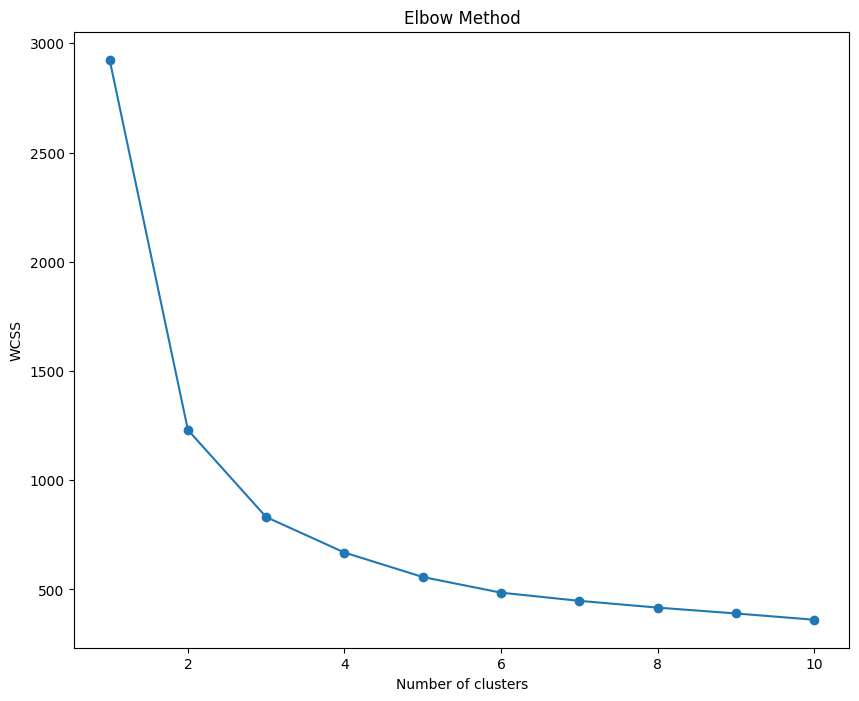

Cluster Centers:
[[  1.44155844   2.75324675 109.69150745  22.92386198  22.38092343
   21.4291752   21.40783203  20.9819951   20.84680249  20.71451348
   20.33242044  20.15946275  19.87395747  19.46247905  19.46247905]
 [  2.1875       4.0125      51.0875      10.77999019   9.04502369
    8.09489846   7.06558016   6.98555537   6.97712417   6.6163729
    6.51102461   6.16256181   5.97028241   5.84014405   5.84014405]
 [  1.26315789   4.10526316 161.84210526  36.84408179  38.19664387
   39.46644582  40.57243382  40.97252765  41.25546806  40.84667491
   40.79220922  40.5793308   40.62148185  40.6686529   40.6686529 ]]


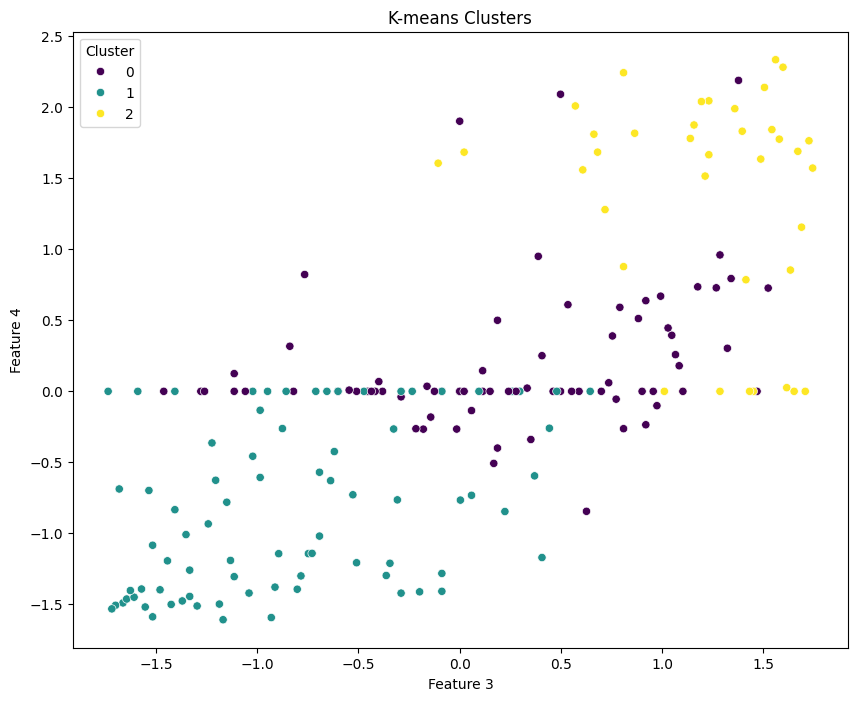

Silhouette Score: 0.3769807754556176


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(exclude=[np.number])

# Handle missing values
numeric_features.fillna(numeric_features.mean(), inplace=True)

if not categorical_features.empty:
    categorical_features.fillna(categorical_features.mode().iloc[0], inplace=True)

# Combine the processed numeric and categorical features
df_filtered = pd.concat([numeric_features, categorical_features], axis=1)

# Standardize the numerical dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_features)

# Verify there are no NaNs after scaling
if np.isnan(df_scaled).sum() == 0:
    print("No NaN values in scaled data.")
else:
    print("There are NaN values in scaled data. Check preprocessing.")

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')  # Save in current directory
plt.show()

# Fit K-means with the optimal number of clusters (e.g., 3)
optimal_clusters = 3  # Adjust based on Elbow method results
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)
df_filtered['Cluster'] = kmeans.labels_

# Analyze clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

# Plot clusters
feature_1_index = 2
feature_2_index = 3

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_scaled[:, feature_1_index], y=df_scaled[:, feature_2_index], hue=df_filtered['Cluster'], palette='viridis')
plt.title('K-means Clusters')
plt.xlabel(f'Feature {feature_1_index + 1}')
plt.ylabel(f'Feature {feature_2_index + 1}')
plt.savefig('Kmeans_Clusters.png')  # Save in current directory
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df_filtered['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


K-means Clustering with Hyperparameter Tuning

No NaN values in scaled data.


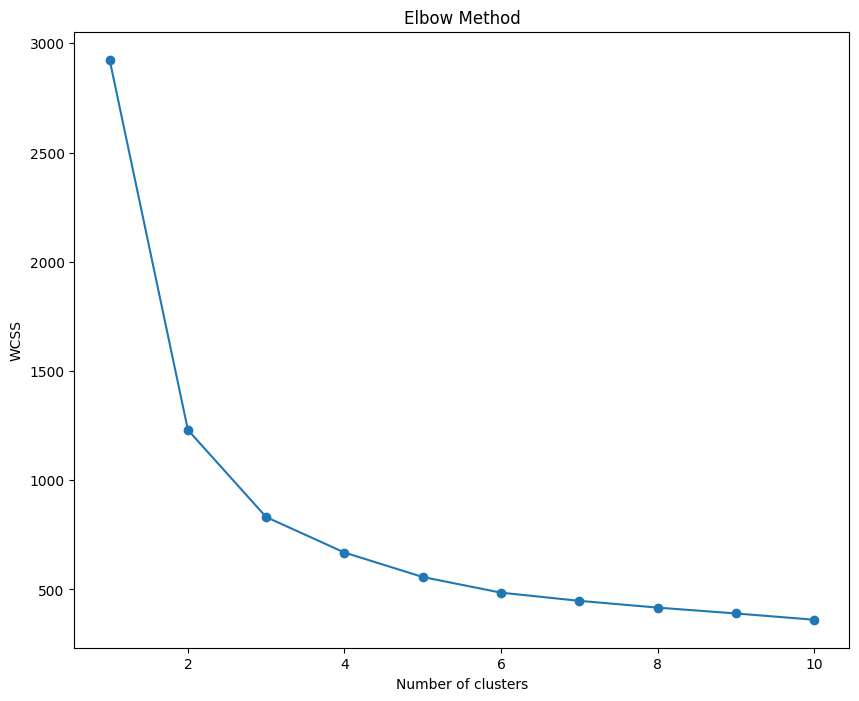

Best hyperparameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Cluster Centers:
[[  1.328125     3.6875     153.046875    32.8477057   33.41942755
   33.95018483  34.77552908  34.71458301  35.09993082  35.01407593
   34.95860426  35.04979524  35.04965375  35.03508143  35.03508143]
 [  1.90076336   3.45801527  67.84920667  14.69739337  13.43177178
   12.40115633  11.67761911  11.52428084  11.33348046  10.95877983
   10.68115741  10.26039123   9.98744876   9.6869161    9.6869161 ]]


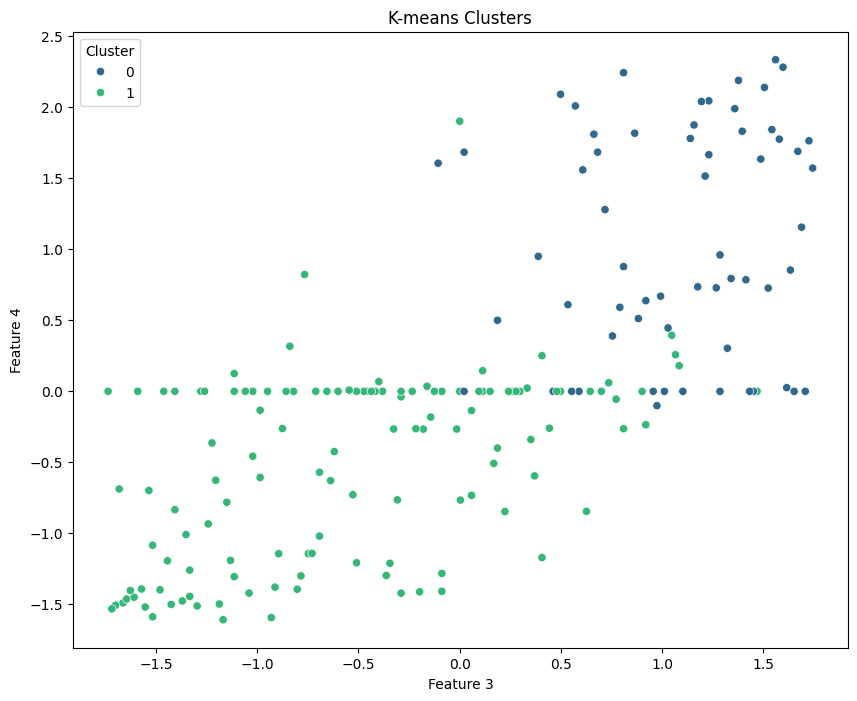

Silhouette Score: 0.4814743403603238


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(exclude=[np.number])

# Handle missing values
numeric_features.fillna(numeric_features.mean(), inplace=True)

if not categorical_features.empty:
    categorical_features.fillna(categorical_features.mode().iloc[0], inplace=True)

# Combine the processed numeric and categorical features
df_filtered = pd.concat([numeric_features, categorical_features], axis=1)

# Standardize the numerical dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_features)

# Verify there are no NaNs after scaling
if np.isnan(df_scaled).sum() == 0:
    print("No NaN values in scaled data.")
else:
    print("There are NaN values in scaled data. Check preprocessing.")

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')  # Save in current directory
plt.show()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500]
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(df_scaled)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Fit K-means with the optimal hyperparameters
optimal_kmeans = KMeans(**best_params, random_state=42)
optimal_kmeans.fit(df_scaled)
df_filtered['Cluster'] = optimal_kmeans.labels_

# Analyze clusters
cluster_centers = scaler.inverse_transform(optimal_kmeans.cluster_centers_)
print("Cluster Centers:")
print(cluster_centers)

# Plot clusters
feature_1_index = 2
feature_2_index = 3

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_scaled[:, feature_1_index], y=df_scaled[:, feature_2_index], hue=df_filtered['Cluster'], palette='viridis')
plt.title('K-means Clusters')
plt.xlabel(f'Feature {feature_1_index + 1}')
plt.ylabel(f'Feature {feature_2_index + 1}')
plt.savefig('Kmeans_Clusters.png')  # Save in current directory
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df_filtered['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


In [ ]:
# Get feature names from the numeric features dataframe
feature_names = numeric_features.columns[:4]
print("Feature 1:", feature_names[2])
print("Feature 2:", feature_names[3])


Feature 1: HDI Rank (2021)
Feature 2: Inequality in Education (2010)


# MEANSHIFT CLUSTERING

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score
import matplotlib.pyplot as plt

[1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 2 0 0 1
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0]
Silhouette Score: 0.5045970536976205
Calinski-Harabasz Index: 221.82088886709835
Davies-Bouldin Index: 0.6193836929971858


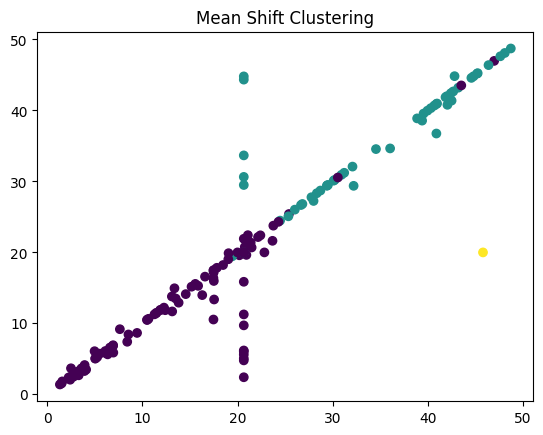

In [ ]:
# Before hyperparameter tuning

predict = np.array(predicted)
predict_reshape = predict.reshape(-1, 1)

X = np.concatenate((X, predict_reshape), axis=1)

# Mean Shift clustering
ms = MeanShift()
labels = ms.fit_predict(X)

print(labels)

# Internal evaluation
sil_score = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Index: {ch_score}')
print(f'Davies-Bouldin Index: {db_score}')

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()

Estimated Bandwidth: 33.60202825126651
Bandwidth Range: [16.80101413 17.95970475 19.11839538 20.27708601 21.43577664 22.59446727
 23.7531579  24.91184853 26.07053916 27.22922979 28.38792042 29.54661105
 30.70530168 31.86399231 33.02268294 34.18137357 35.3400642  36.49875482
 37.65744545 38.81613608 39.97482671 41.13351734 42.29220797 43.4508986
 44.60958923 45.76827986 46.92697049 48.08566112 49.24435175 50.40304238]


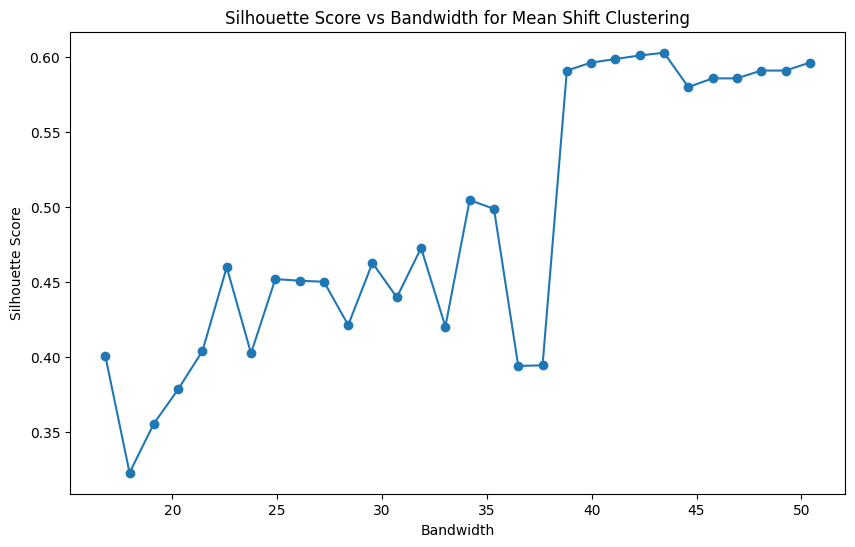

Optimal Bandwidth: 43.45089860077566


In [ ]:
# Estimate initial bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=100)
print(f"Estimated Bandwidth: {bandwidth}")

# Define the range around the estimated bandwidth
bandwidths = np.linspace(bandwidth * 0.5, bandwidth * 1.5, num=30)
print(f"Bandwidth Range: {bandwidths}")


# List to store silhouette scores
silhouette_scores = []

for bw in bandwidths:
    ms = MeanShift(bandwidth=bw)
    labels = ms.fit_predict(X)

    if len(np.unique(labels)) > 1:  # Silhouette score is undefined for a single cluster
        score = silhouette_score(X, labels)
    else:
        score = -1  # Assign a poor score if only one cluster is found
    silhouette_scores.append(score)

# Plot the silhouette scores against bandwidths
plt.figure(figsize=(10, 6))
plt.plot(bandwidths, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Bandwidth for Mean Shift Clustering')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.show()

# Optimal bandwidth
optimal_bandwidth = bandwidths[np.argmax(silhouette_scores)]
print(f"Optimal Bandwidth: {optimal_bandwidth}")


[1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0]
Silhouette Score: 0.6028911778734504
Calinski-Harabasz Index: 443.0338479887639
Davies-Bouldin Index: 0.5720747653061219


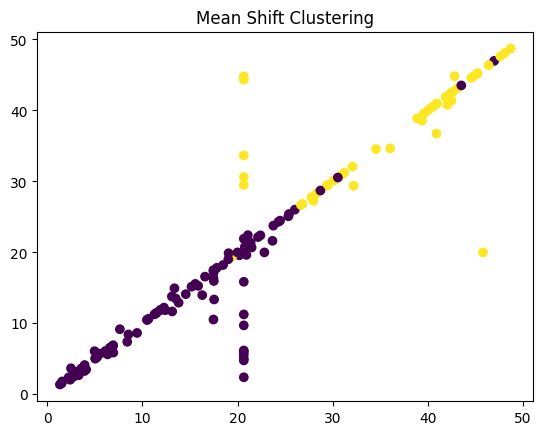

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score
import matplotlib.pyplot as plt

# Mean Shift clustering with Optimal Bandwith
ms = MeanShift(bandwidth=optimal_bandwidth)
labels = ms.fit_predict(X)

print(labels)

# Internal evaluation
sil_score = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
db_score = davies_bouldin_score(X, labels)

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Index: {ch_score}')
print(f'Davies-Bouldin Index: {db_score}')

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()